## Implement Logistic Regression

#### Import required dependecies

In [38]:
import numpy as np                               #for numerical operations
import matplotlib.pyplot as plt                  #for data visualisation
from sklearn.datasets import load_breast_cancer  #load data from scikit learn datasets

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')


In [39]:
x, y = load_breast_cancer(return_X_y= True)      #load data from scikit learn datasets

In [40]:
#scaled input data
mean = np.mean(x, axis = 0)                      
std_dev = np.std(x, axis = 0)
x = (x-mean)/std_dev
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [41]:
x_b = np.c_[np.ones((x.shape[0], 1)), x]         #add bias x0 = 1
y = y.reshape(-1, 1)

In [42]:
theta = np.random.rand(x_b.shape[1], 1)                     #initiate random theta
n_iteration = 10000                                         #number of iterations
eta = 0.05                                                  #learning rate
for i in range(n_iteration):                                #iterate over number of iteration
    z = x_b.dot(theta)                                      #calculate prediction
    sigmoid = 1/(1 + np.exp(-z))                            #calculate sigmoid
    gradient = x_b.T.dot(sigmoid - y)/x.shape[0]            #calculate gradient
    theta -= eta * gradient                                 #calculate best theta


In [43]:
z = x_b.dot(theta)                                      #multiply best theta with input value
y_predict = 1/(1 + np.exp(-z))                          #calculate sigmoid
y_predict = y_predict[np.where(y_predict > 0.5)]        #get only value which have predicted value greter than 0.5                   


### Plot decision boundry

In [44]:
x_values = np.array([min(x_b[:,2]) -1, max(x_b[:, 2]) + 1])

In [45]:
y_values = -(theta[0] + theta[1] * x_values) / theta[2]

Text(0.5, 1.0, 'Decision Boundry of Logistic Regression on Breast Cancer Dataset')

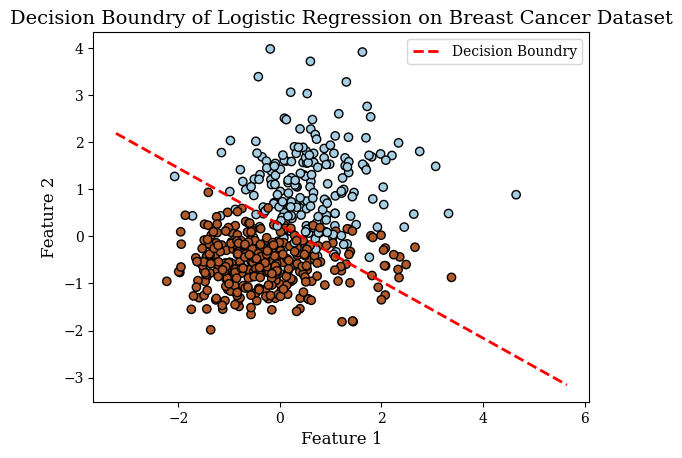

In [46]:
plt.scatter(x[:,1], x[:, 2],c = y, cmap = plt.cm.Paired, edgecolors= 'k')
plt.plot(x_values, y_values, 'r--',label = 'Decision Boundry')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundry of Logistic Regression on Breast Cancer Dataset')